# Rank Biserial Correlation $r_{rb}$

The rank biserial correlation is a nonparametric correlation that describes the relationship between a dichotomous variable and an ordinal variable. If you have some passing familiarity with non-parametric statistical tests, then you may recognize it as being used in the Mann Whitney U test. The point of the rank biserial correlation is to indicate the proportion of favorable vs. unfavorable rank comparisons between the groups of the dichotomous variable.

An example of a use case scenario is if you wanted to compare the frustration ratings for opening a new packaging design between right-hand dominant people with left-hand dominant people.
- dichotomous variable: Dominant hand
- ordinal variable: Frustration

The general form of this correlation is:

$r_{rb} = 2*\frac{(Y_{1} - Y_{0})}{n}$

- $Y_{1}, Y_{0}$ are means of the ranks computed for data pairs.
- _n_ is the number of observations

__Interpreting $r_{rb}$__

As with many other correlation values, $r_{rb}$ is within the range of [-1, 1], where 0 indicates no correlation.

|Correlation Coefficient | Interpretation |
|---------------------------|----------------|
| 0.00 – 0.10 | Negligible or trivial |
| 0.10 – 0.30 | Weak |
| 0.30 – 0.50 | Moderate |
| 0.50 – 1.00 | Strong |

__Assumptions__
1. One variable is dichotomous, and the other is ordinal.

## Python Example

To illustrate the use of the rank biserial correlation, I will generate 100 observations randomly.

In [1]:
# Import
import numpy as np
import pandas as pd

# Correlation coefficient
import scipy.stats as stats

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Seed
np.random.seed(10)

# Create the dataframe
df = pd.DataFrame(data={'handedness': list(np.random.randint(0, 2, 100)),
                        'frustration': list(np.random.randint(1, 6, 100))})

In the above dataset assume the following:
- Handedness: 0 is left hand dominant, 1 is right hand dominant.
- Frustration: 1 is not at all frustrated, 5 is very frustrated.

In [21]:
# Turn handedness into a categorical variable
df['handedness'] = df['handedness'].astype('category')

# Look at the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   handedness   100 non-null    category
 1   frustration  100 non-null    int64   
dtypes: category(1), int64(1)
memory usage: 1.1 KB


In [34]:
# Describe via crosstabs
pd.crosstab(df['handedness'], df['frustration'], margins=True)

frustration,1,2,3,4,5,All
handedness,,,,,,
0,12,16,8,10,9,55
1,10,12,8,9,6,45
All,22,28,16,19,15,100


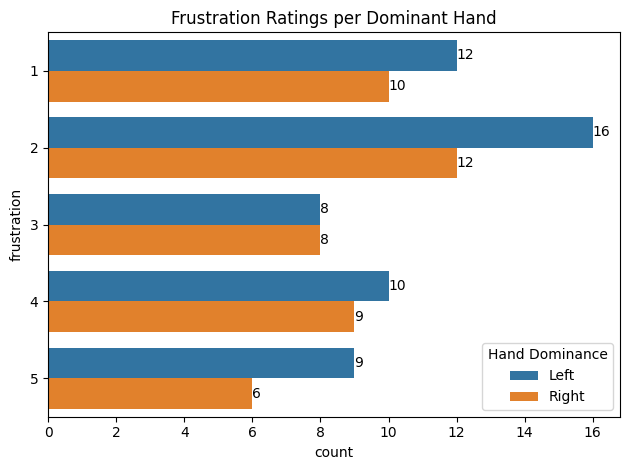

In [43]:
# Visualize
sns.countplot(y='frustration', hue='handedness', data=df)
# Bar annotations
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])

# Title
plt.title('Frustration Ratings per Dominant Hand')

# Legend
plt.legend(loc='lower right', labels=['Left', 'Right'], title='Hand Dominance')

# Display
plt.tight_layout()
plt.show()

In python, the easiest way to get the rank biserial correlation is to run a Mann-Whitney U test and calculate the correlation manually.

In [44]:
# subset left and right
left_hand = df[df['handedness'] == 0]['frustration']
right_hand = df[df['handedness'] == 1]['frustration']

# Set up the test
u, p = stats.mannwhitneyu(left_hand, right_hand, alternative='two-sided')

In [49]:
# Get sizes of each group
n_left = len(left_hand)
n_right = len(right_hand)

# Calculate the r_rb
r_rb = 2 * u / (n_left * n_right) - 1

# Show
print(f'Rank biserial correlation = {r_rb} | p-value: {p}')

Rank biserial correlation = 0.007676767676767726 | p-value: 0.9490732935909326


As can be seen above, the correlation is practically non-existent. To see if it is significant, you can use p value generated from the Mann Whitney test. Unsurprisingly, it is not significant for this weak correlation.